In [1]:
# Dataset consists of monthly totals of international airline passengers, between 1949 to 1960.
# Objective - analysis and modelling of time series. (ARIMA Modelling Procedure)
# Procedure  -Perform exploratory data analysis
#            -Decomposition of data
#            -Test the stationary


In [56]:
#Importing needed libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

import warnings
warnings.filterwarnings('ignore')

In [57]:
data = pd.read_csv("E:/DATA/Machine Learning_Simplilearn/Demo Datasets/Lesson 8/AirPassengers.csv")

In [58]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [59]:
data.info

<bound method DataFrame.info of        Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]>

In [60]:
data.columns


Index(['Month', '#Passengers'], dtype='object')

In [61]:
data['Month'].head()

0    1949-01
1    1949-02
2    1949-03
3    1949-04
4    1949-05
Name: Month, dtype: object

In [62]:
data["Month"] = data["Month"].apply(lambda x: dt(int(x[:4]),int(x[5:]),15)) #first 4 strings years and month starts from 5th
data = data.set_index('Month')
data.head()

,#Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121


In [63]:
ts = data["#Passengers"]

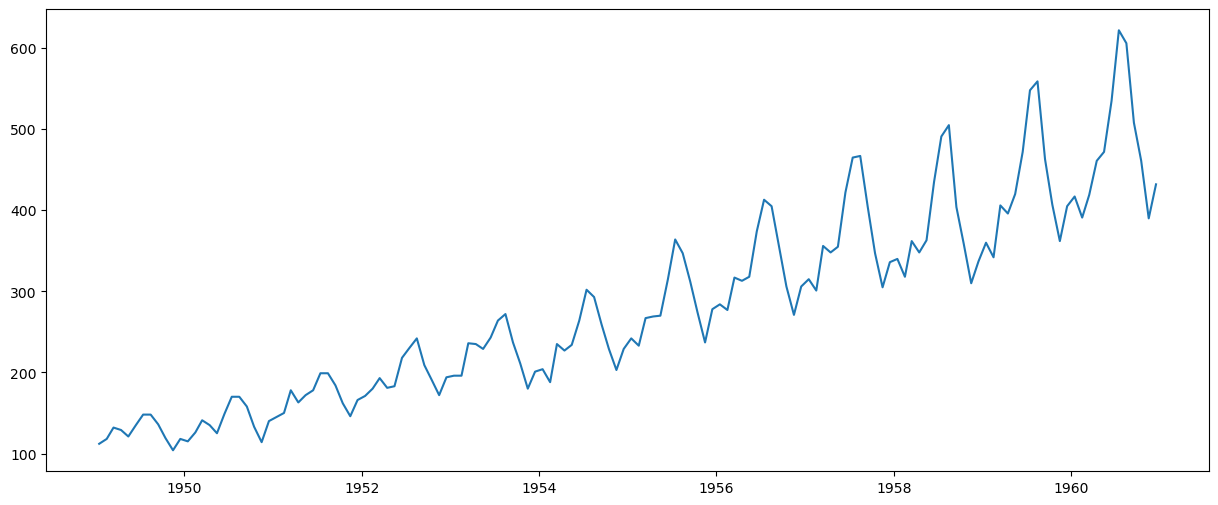

In [64]:
plt.plot(ts)

In [65]:
#transforming time series with log decomposition
ts_log = np.log(ts)

In [66]:
#stationarity check

def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=52,center=False).mean()
    rolstd = timeseries.rolling(window=52,center=False).std()
    
    orig = plt.plot(timeseries,color = 'blue', label="Original")
    mean = plt.plot(rolmean,color = 'red', label = "Rolling Mean")
    std = plt.plot(rolstd,color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title("Rolling mean and Standard deviation")
    plt.show(block=False)
    
    print("Results of Dickey-Fuller test:")
    dftest = adfuller(timeseries,autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic', 'p-value', '#Lags Used',
                                           'Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

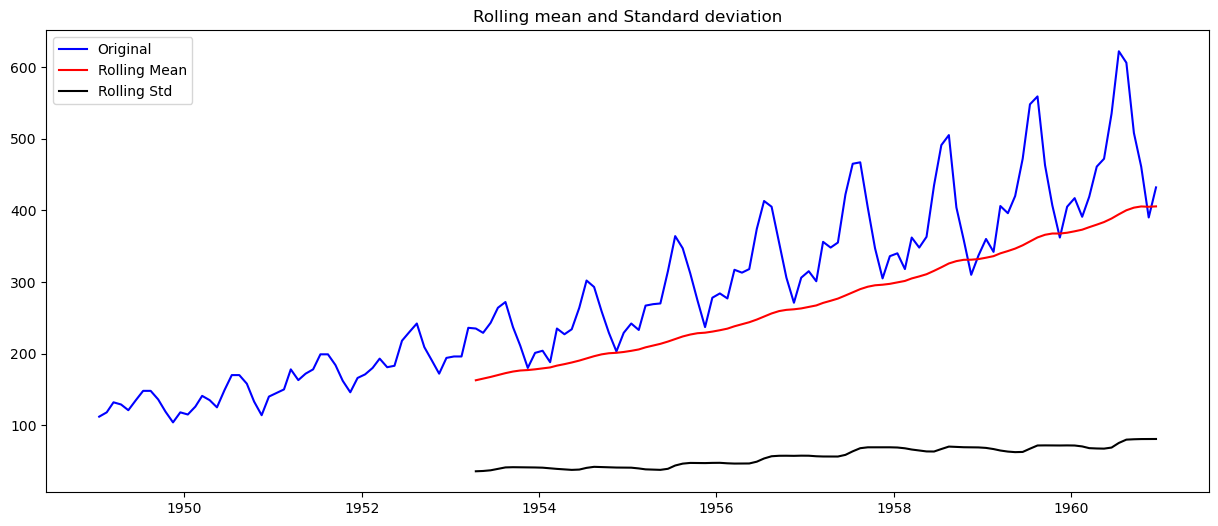

Results of Dickey-Fuller test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [67]:
test_stationarity(data["#Passengers"])

### Test statistic is more than Critical value and the moving average in not constant over time So the null hypothesis of Dickey-Fuller test is not rejected. This shows that the time series is not stationary.

### Decomposing the Data

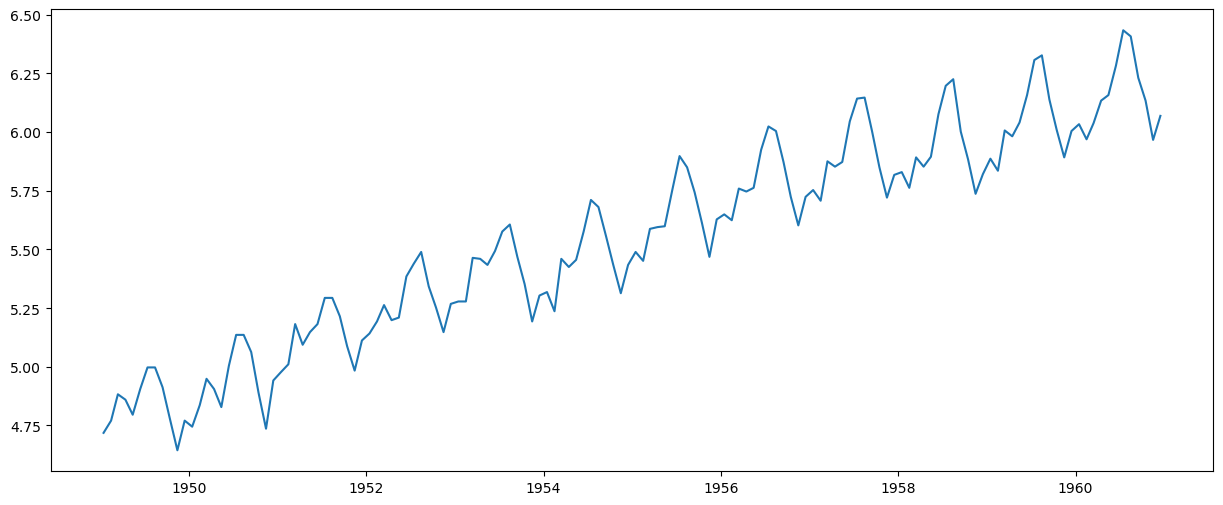

In [68]:
plt.plot(ts_log)

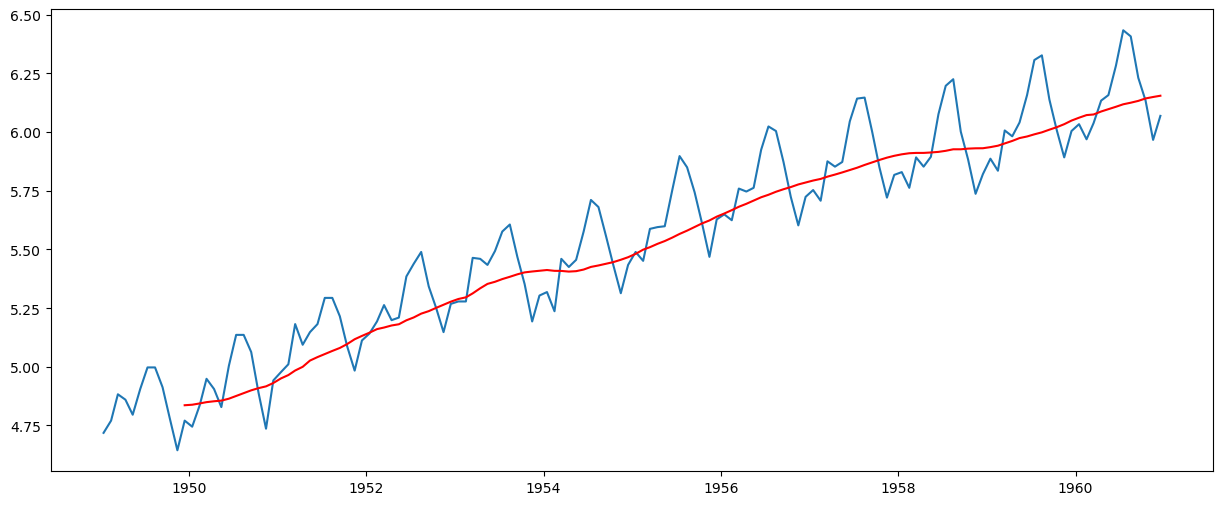

In [71]:
movingAverage = ts_log.rolling(window=12).mean()
movingSTD = ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(movingAverage, color = 'red')

In [72]:
ts_log_mv_diff = ts_log - movingAverage
ts_log_mv_diff.head(12)

ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(10)



Month
1949-12-15   -0.065494
1950-01-15   -0.093449
1950-02-15   -0.007566
1950-03-15    0.099416
1950-04-15    0.052142
1950-05-15   -0.027529
1950-06-15    0.139881
1950-07-15    0.260184
1950-08-15    0.248635
1950-09-15    0.162937
Name: #Passengers, dtype: float64

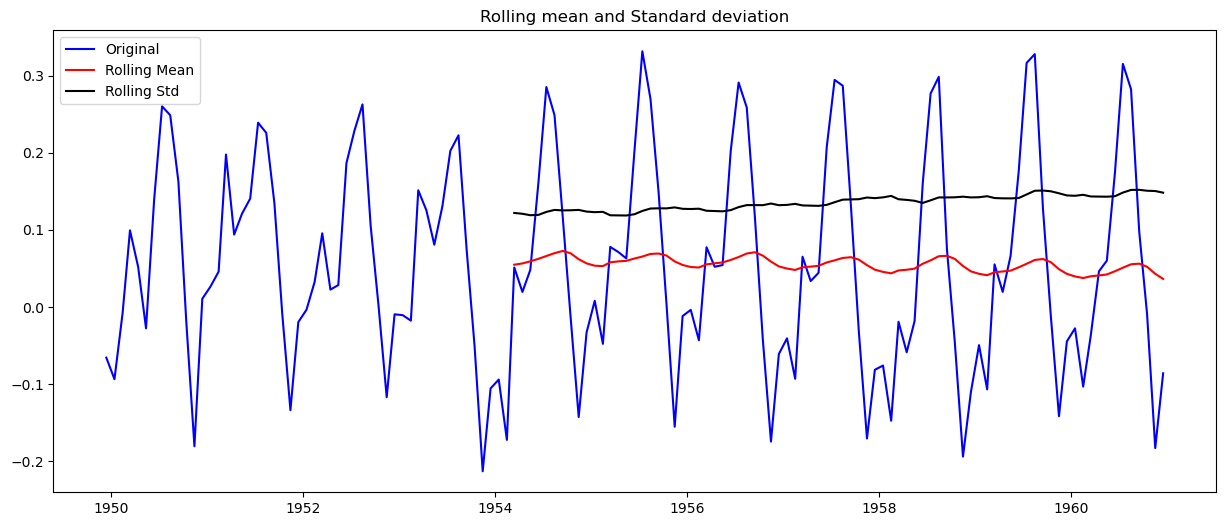

Results of Dickey-Fuller test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of observations used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [73]:
test_stationarity(ts_log_mv_diff)

### Test statistic is less than critical value (1%) therefore 99% confident that this series is staionary we can reject the null hypothesis.